In [1]:
import maintsim

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
sys = maintsim.System(process_times=[3, 5, 2],
                      failure_mode='degradation',
                      failure_params=[0.3]*3,
                      repair_params={'CM':stats.randint(10,20)},
                      scheduler_class=maintsim.Scheduler,
                      maintenance_capacity=1)#,
                      #planned_failures=[(1,30,20)])

In [4]:
sys.simulate(sim_time=100)

Simulation complete in 0.19s

  Units produced:      8
  System availability: 80.33%



In [4]:
sys.maintenance_data

,time,machine,type,activity,duration
0,27,2,CM,failure,NA
1,33,1,CM,failure,NA
2,34,0,CM,failure,NA
3,44,2,CM,repair,16
4,63,1,CM,repair,18
5,74,0,CM,repair,10
6,85,2,CM,failure,41
7,88,1,CM,failure,25


In [10]:
sys.scheduler.__init__()

TypeError: __init__() missing 2 required positional arguments: 'system' and 'env'

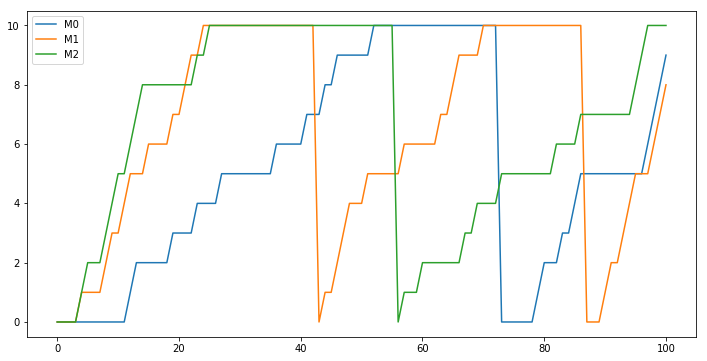

In [8]:
plt.figure(figsize=(12,6))
for i in range(sys.M):
    plt.plot(sys.machine_data['M{} health'.format(i)], label='M{}'.format(i))
plt.legend()
plt.show()

In [4]:
sys.maintenance_data.dropna()

,time,machine,type,activity,duration
100,59,0,CM,failure,NA
101,59,2,CM,failure,NA
0,93,2,CM,repair,15


In [6]:
sys.machines[1].health

10

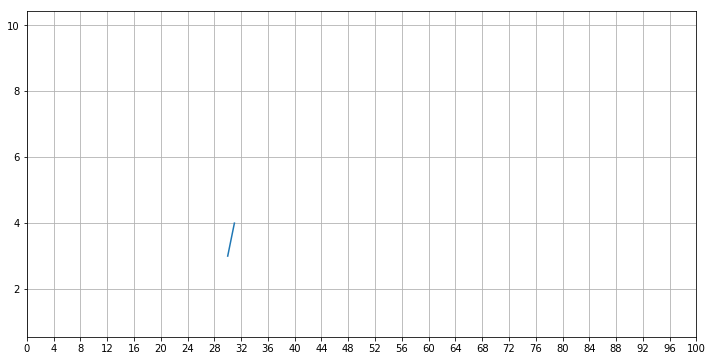

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M1 health'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()

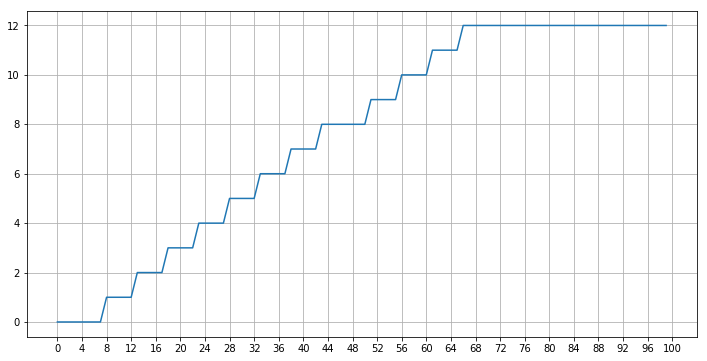

In [7]:
plt.figure(figsize=(12,6))
plt.plot(sys.production_data['M1 production'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()